In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Metodo de la potencia

## Ejercicio:

Implementar el método de la potencia considerando algún criterio de parada

In [2]:
import numpy as np
import random

def power_iteration(A, niter=10_000, eps=1e-6):
    """
    Calcula el autovector al autovalor asociado de valor máximo


    Devuelve (a, v) con a autovalor, y v autovector de A

    Arguments:
    ----------

    A: np.array
        Matriz de la cual quiero calcular el autovector y autovalor

    niter: int (> 0)
        Cantidad de iteraciones

    eps: Epsilon
        Tolerancia utilizada en el criterio de parada
    """

    autovalV = 0
    autoValPrev = 0
    #[np.ones(A.shape[0])]
    v = []
    """
    TODO: Completar el método de la potencia

    IMPORTANTE: Agreguen algún criterio de parada!
    """
    for i in range(A.shape[0]):
      # generating a random number in the range 1 to 100
      v.append(random.randint(1,100))

    v = v/np.linalg.norm(v)


    previousVector = v

    v = A @ v / np.linalg.norm(A @ v)


    vxEscalar = A @ v;


    for i in range(len(v)):
      autovalV+= vxEscalar[i]/v[i]

    autovalV = autovalV / len(v)

    while(abs(autovalV-autoValPrev)>eps):
      previousVector = v
      autoValPrev = autovalV

      autovalV = 0

      v = A @ v / np.linalg.norm(A @ v)
      vxEscalar = A @ v;

      for i in range(len(v)):
        autovalV+= vxEscalar[i]/v[i]

      autovalV = autovalV / len(v)



    return autovalV, v


Verifiquemos la implementación un ejemplo conocido:

$$
A = Q^T \begin{pmatrix}
d_1    &0     &0      &0      &\\
0      &d_2   &0      &0      &\\
\vdots &\vdots&\ddots &\vdots &\\
0      &0     &0      &d_n    & \\
\end{pmatrix} Q
$$

con $Q = I - 2 v v^T$, $||v||_2=1$
 la matriz de reflexión que sabemos que es ortogonal

Probemos calcular el método de la potencia con esto.

In [3]:
#@title


D = np.diag([7.0, 4.0, 3.0, 2.0, 1.0])

v = np.ones((D.shape[0], 1))


v = v / np.linalg.norm(v)



# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)



# Matriz a diagonalizar
M = B.T @ D @ B

l,v = power_iteration(M)
print(l)
v = np.array([v])


print(v.T@v)

6.9999989775934655
[[ 0.35999902 -0.23999894 -0.24000016 -0.24000016 -0.24000016]
 [-0.23999894  0.15999902  0.15999984  0.15999984  0.15999984]
 [-0.24000016  0.15999984  0.16000065  0.16000065  0.16000065]
 [-0.24000016  0.15999984  0.16000065  0.16000065  0.16000065]
 [-0.24000016  0.15999984  0.16000065  0.16000065  0.16000065]]


# Metodo de la potencia + Deflación

Implementar método de la potencia + deflación

In [4]:
#@title
def eigen(A, num=2, niter=10000, eps=1e-6):
    """
    Calculamos num autovalores y autovectores usando método de la potencia+deflación
    A' = A - λ1 * v1 * v1^T,
    """
    if(num>A.shape[0]):
        print("Se pidieron mas eigenVecs de los posibles")


    A = A.copy()
    eigenvalues = []
    eigenvectors = []
    for i in range(num):
      l, v = power_iteration(A)
      v = np.array([v])
      eigenvalues.append(l)
      eigenvectors.append(v)
      A = A - np.matmul(v.T,v)*l


    return np.array(eigenvalues), eigenvectors



## Casos de prueba para "jugar"

Matriz de Householder y Matriz Diagonal.

In [5]:

D = np.diag(range(10, 0, -1))
#print(D)
v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz ya diagonalizada
M = D

#@title
#%%time
l, v = power_iteration(M, niter=1000, eps=1e-6)

#@title
#l, v

#@title
#%%time
N = 10
D = np.diag(range(N, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B
# Para todos los eigen el ejemplo anterior de householder.

print(D)
l, v = eigen(M, N, niter=5_000)
print(l)
print(v[0])

[[10  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  1]]
[9.99999108 8.99999282 7.99999361 6.99999427 5.9999955  4.99999676
 3.99999707 3.00000151 1.99999942 1.        ]
[[-0.79999524  0.19998096  0.20000476  0.20000476  0.20000476  0.20000476
   0.20000476  0.20000476  0.20000476  0.20000476]]


Otros ejemplos

In [6]:

#@title
# CASO SIMETRICO
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])
w, V = eigen(A, num=3, niter=20000, eps=1e-24)
for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V[i].T, w[i] * V[i].T))
print("Gracias teorema espectral! (ver pdf teórico)")

#@title
# CASO (A) * (A traspuesta)
AT = A @ A.T
TA = A.T @ A
wta, VTA = eigen(AT, num=3, niter=20000, eps=1e-24)
wat, VAT = eigen(TA, num=3, niter=20000, eps=1e-24)
print("Bingo :)" if np.allclose(wat,wta) else "Bongo :(")

0
True
1
True
2
True
Gracias teorema espectral! (ver pdf teórico)
Bingo :)


¿Y este?

In [7]:
#@title
# CASO
A = np.array([
  [7, 2, 3],
  [0, 2, 0],
  [-6, -2, -2]
])

w, V = eigen(A, num=3, niter=20000, eps=1e-24)
print("w")
print(w)
print("V")
print(V)

#@title
print(A)
for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V[i].T, w[i] * V[i].T))

#@title
print("uso una biblioteca")
w2, V2 = np.linalg.eig(A)
print(w2)
print(np.dot(V2[:,0],V2[:,2]))
print(np.dot(V2[:,0],V2[:,1]))
print(np.dot(V2[:,2],V2[:,1]))

w
[3.33333396 1.99999694 1.00000344]
V
[array([[ 7.07106781e-01,  3.32142485e-07, -7.07106781e-01]]), array([[ 0.6396024 ,  0.42640075, -0.63960235]]), array([[-0.42349738, -0.77086089,  0.47583974]])]
[[ 7  2  3]
 [ 0  2  0]
 [-6 -2 -2]]
0
False
1
False
2
False
uso una biblioteca
[4. 1. 2.]
-0.8164965809277259
-0.9486832980505137
0.7745966692414833


# PCA y reconstrucción de rostros

In [8]:
from pathlib import Path
import pandas as pd
#import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
### TODO
### --> completar con la URL que se pase en clase .!wget

In [4]:
X = pd.read_csv('caras.csv').values
X.shape

[[ 56  53  56 ... 106 126  81]
 [ 54  57  55 ... 121 112 135]
 [ 55  56  56 ... 100 148  97]
 ...
 [121 121 120 ...  62  63  63]
 [119 121 120 ...  62  65  62]
 [120 121 119 ...  81  82  84]]


(400, 2576)

In [11]:
h,w = 112//2, 92//2
print(w)

46


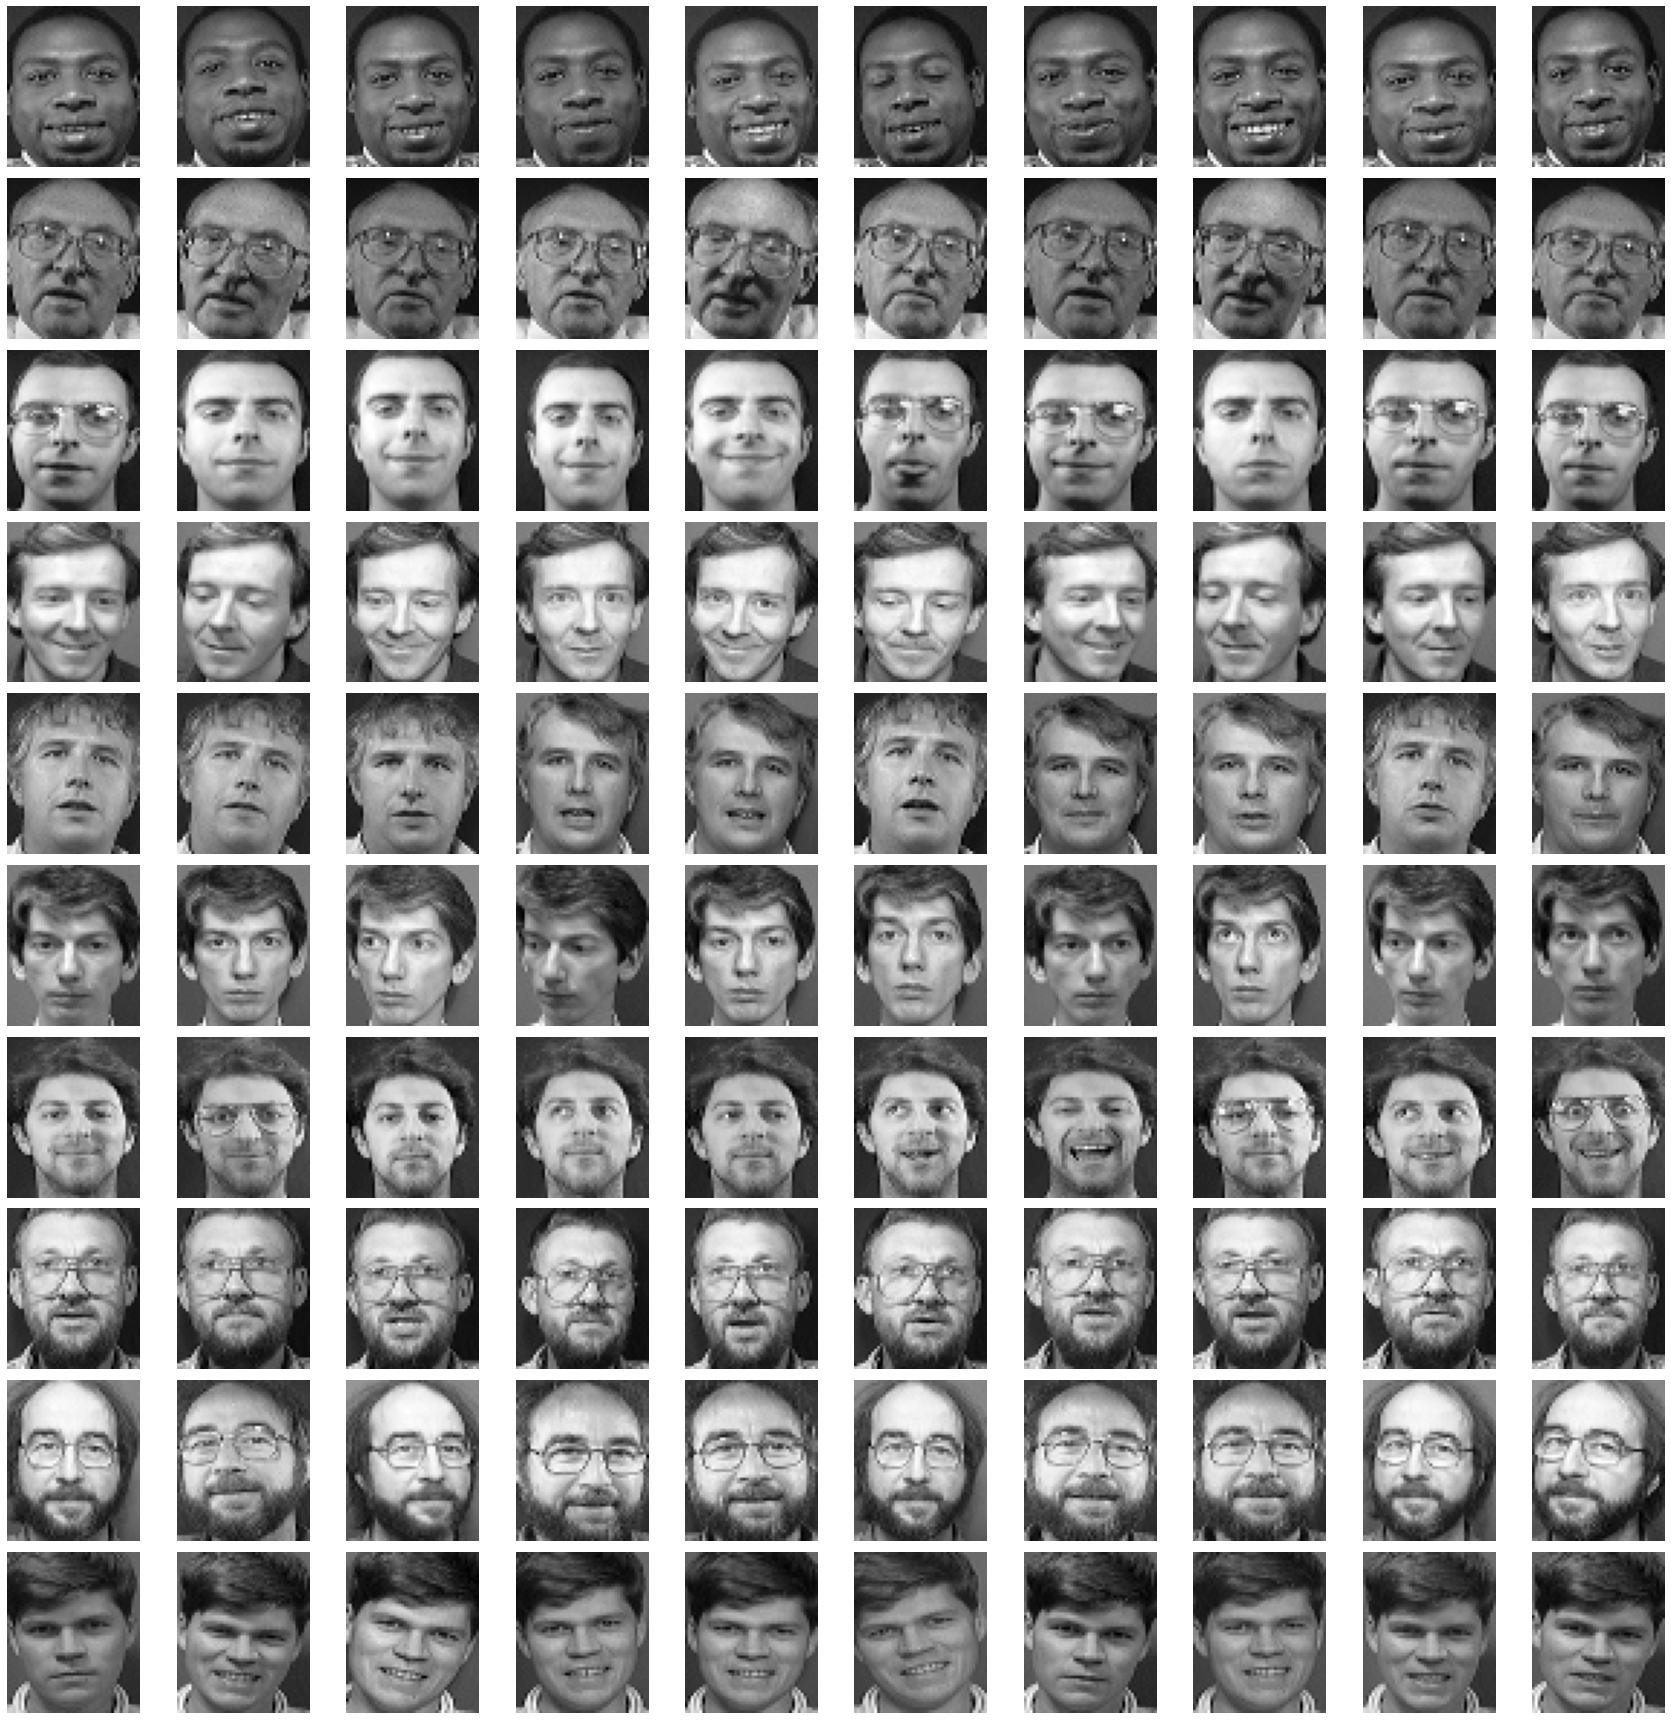

In [12]:
#Aca estan las caras completas
f, axs = plt.subplots(10,10, figsize=(24,24))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(X[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

In [13]:
Xcentered = X - X.mean(0)
print(X)
print("--")
print(X.mean(0))
print("--")
print(Xcentered)
l, V = np.linalg.eigh(Xcentered.T@Xcentered)

print(V.size())




[[ 56  53  56 ... 106 126  81]
 [ 54  57  55 ... 121 112 135]
 [ 55  56  56 ... 100 148  97]
 ...
 [121 121 120 ...  62  63  63]
 [119 121 120 ...  62  65  62]
 [120 121 119 ...  81  82  84]]
--
[85.63   85.8825 86.135  ... 75.8325 75.745  74.76  ]
--
[[-29.63   -32.8825 -30.135  ...  30.1675  50.255    6.24  ]
 [-31.63   -28.8825 -31.135  ...  45.1675  36.255   60.24  ]
 [-30.63   -29.8825 -30.135  ...  24.1675  72.255   22.24  ]
 ...
 [ 35.37    35.1175  33.865  ... -13.8325 -12.745  -11.76  ]
 [ 33.37    35.1175  33.865  ... -13.8325 -10.745  -12.76  ]
 [ 34.37    35.1175  32.865  ...   5.1675   6.255    9.24  ]]


Notar que V son los autovectores de la matriz de covarianza puestos como columnas. La función los devuelve ordenados de manera ascendente.

In [14]:
V.shape

(2576, 2576)

¿Qué pinta tienen los autovectores de la matriz de covarianza?

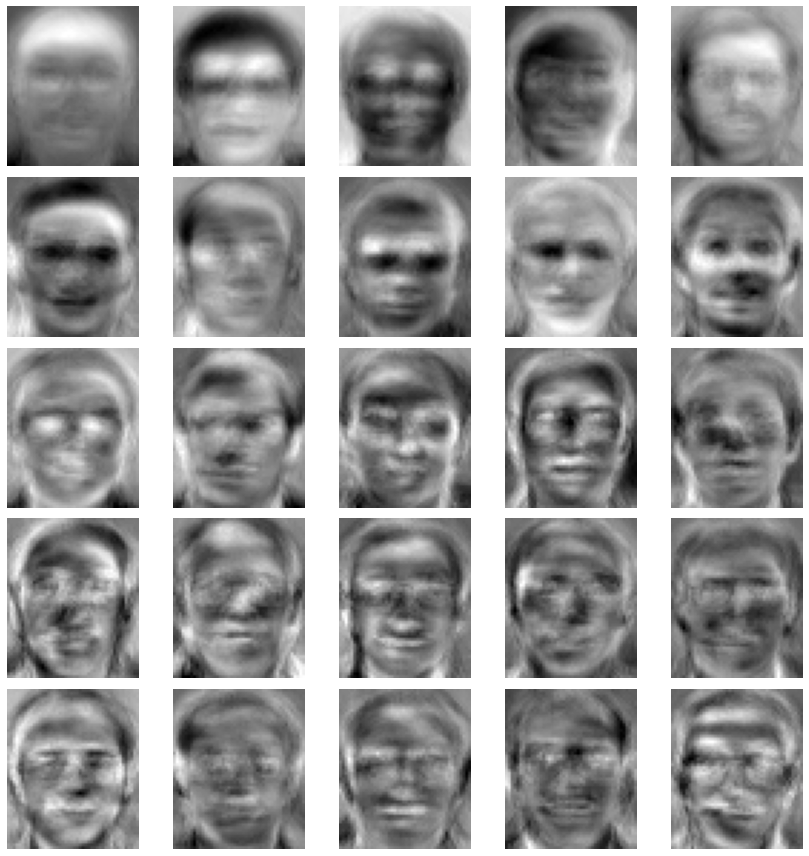

In [15]:
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V[:,-i-1].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

Comparemos lo que obvtuvinos con los resultados segun el pca de sklearn

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(50).fit(X)

In [18]:
pca.components_.shape

(50, 2576)

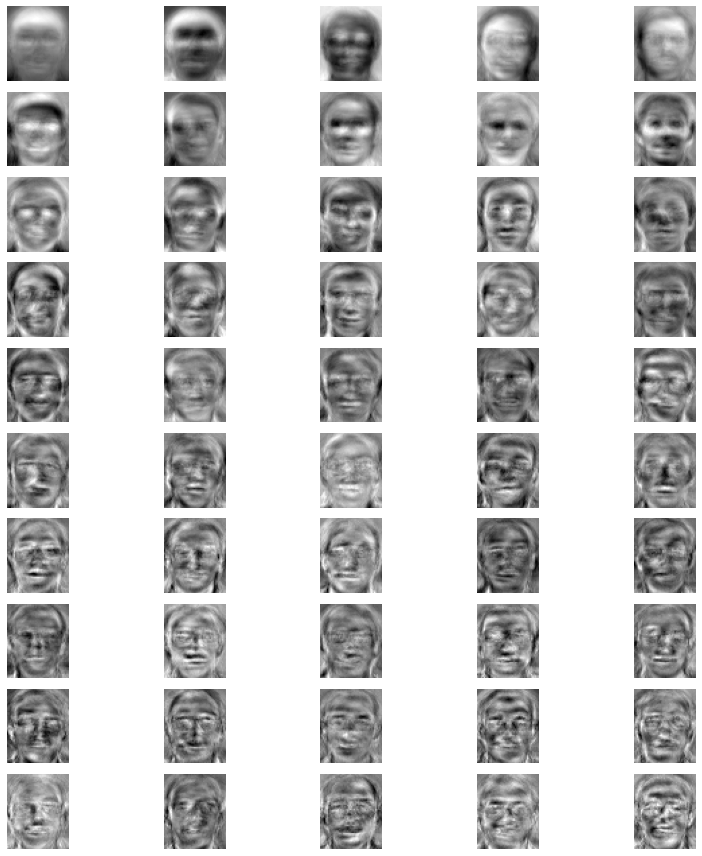

In [19]:
f, axs = plt.subplots(10,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(pca.components_[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

Más componentes más se explica la varianza total, con 50 ya se llega al 95% aprox

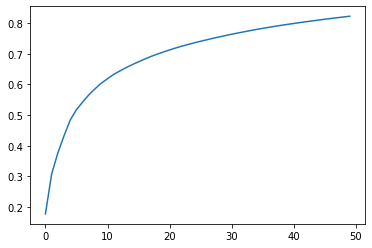

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Conseguimos las coordenadas de las 50 componentes principales (eigenfaces).

In [21]:
Z = pca.transform(X)

Ahora podemos expresar cualquier cara como una combinación lineal de las eigenfaces anteriores. Veamos que tan bien resulta la aproximación con una mera inspección visual.

## Ejercicio:
Aproximar las caras del dataset utilizando 50 componentes principales


-------------------------


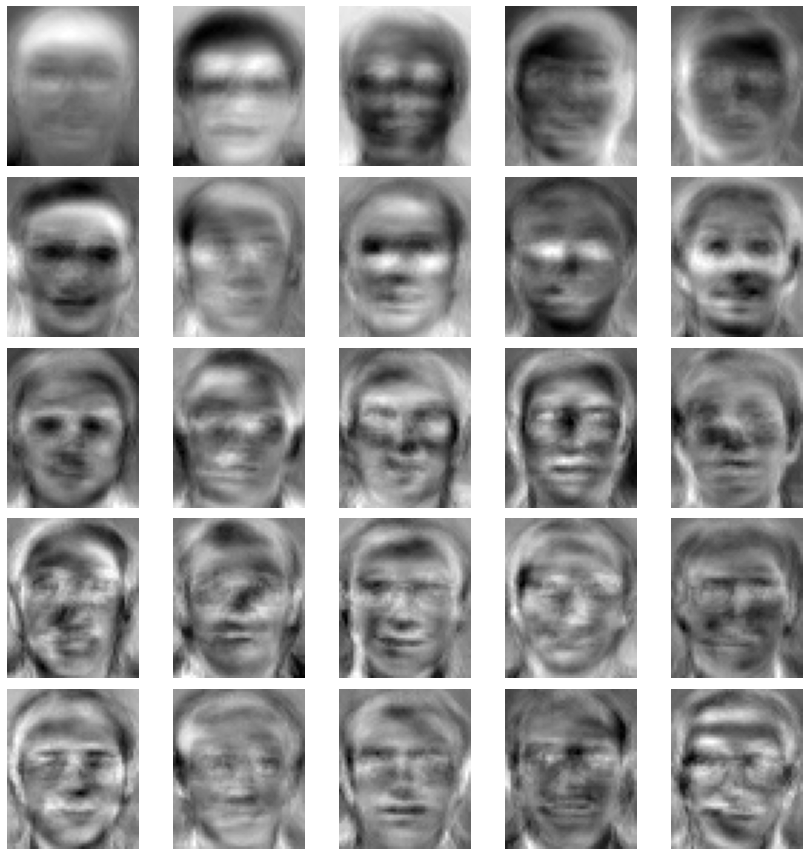

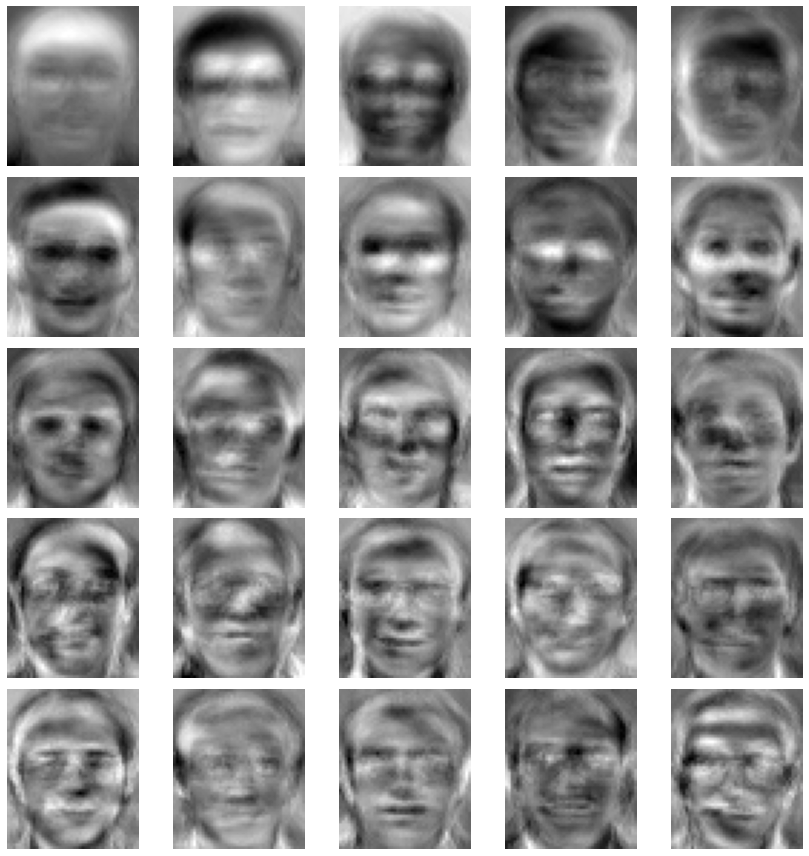

In [22]:
# TO DO
X = pd.read_csv('caras.csv').values
X.shape
h,w = 112//2, 92//2

Xcentered = X - X.mean(0)

#l, V = np.linalg.eigh(Xcentered.T@Xcentered)
"""f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V[:,-i-1].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()"""
#print(type(V))
#print(V[:,-1-1])

l1, V1 = eigen(Xcentered.T@Xcentered,26)
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V1[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()
#eigen(A, num=2, niter=10000, eps=1e-6
print("-------------------------")

l2, V2 = eigen(Xcentered.T@Xcentered,50)
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V2[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()
#print(V1[1])

In [23]:
C = Xcentered @ Xcentered.T /2576/255/255

In [ ]:
C.shape

Producto interno entre cada par de imágenes. Se ve estructura de bloques porque se repite la persona en grupos de 10 imágenes

In [ ]:
plt.figure(figsize=(12,12))
plt.pcolor(C);
plt.colorbar();